In [160]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#importing dataset
data_train = pd.read_csv("/content/train.csv")

In [161]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [162]:
# Assigning each category a number for Category feature
category={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"]=data_train["category"].map(category)
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [163]:
#removing character "F" present in data using pandas slicing
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.comment!='F']

#convert values to integers for views , likes, comments , dislikes and adviews
data_train["views"] = pd.to_numeric(data_train["views"])
data_train["comment"] = pd.to_numeric(data_train["comment"])
data_train["likes"] = pd.to_numeric(data_train["likes"])
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"])
data_train["adview"] = pd.to_numeric(data_train["adview"])
column_vidid=data_train['vidid']

data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [164]:
#convert time in sec for duration
import datetime
import time

def checki(x):
  y=x[2:]
  h=''
  m=''
  s=''
  mm=''
  P=['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else :
      if(i=="H"):
        h=mm
        mm=''
      elif(i=="M"):
        m=mm
        m=''
      else:
        s=mm
        s=''
    if(h==''):
      h='00'
    if(m==''):
      m='00'
    if(s==''):
      s='00'
    bp=h+':'+m+':'+s
    return bp
  train=pd.read_csv("train.csv")
  mp = pd.read_csv(path + "train.csv")["duration"]
  time = mp.apply(checki)

  def func_sec(time_string):
    h,m,s = timestring.split(':')
    return int(h) *3600 + int(m) * 60 + int(s)

  time1=time.apply(func_sec)

  data_train["duration"]=time1

In [165]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [166]:
#encoding features like category, duration, vidid
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data_train["duration"]=le.fit_transform(data_train["duration"])
data_train["published"]=le.fit_transform(data_train["published"])
data_train["vidid"]=le.fit_transform(data_train["vidid"])

data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9005,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


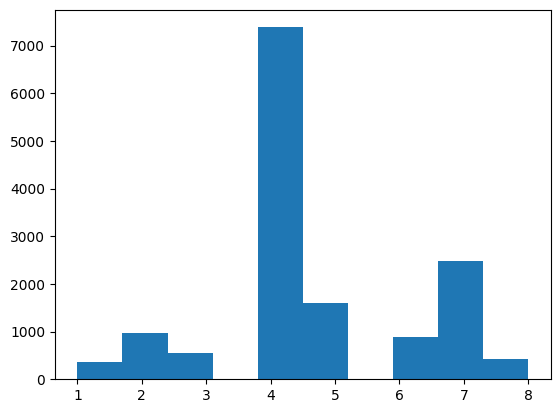

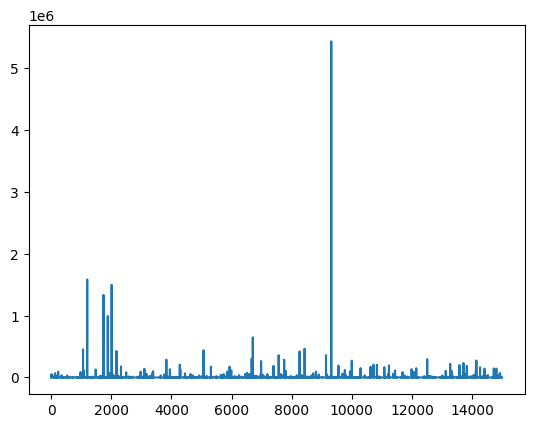

In [167]:
  #Visualisation
  #Individual Plots
  plt.hist(data_train["category"])
  plt.show()
  plt.plot(data_train["adview"])
  plt.show()

In [134]:
  #remove videos with adview greater than 2000000 as outlier
  data_train=data_train[data_train["adview"]<2000000]

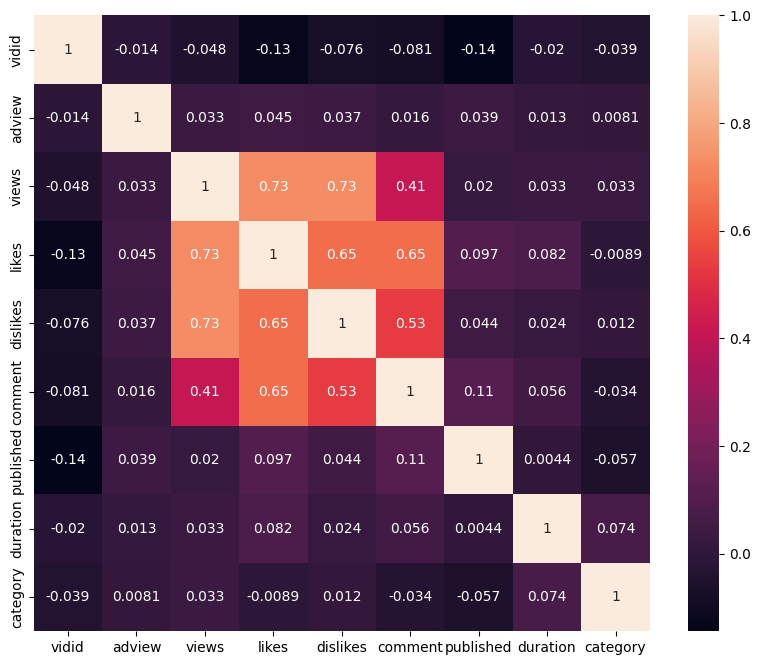

In [168]:
  #heatmap
  import seaborn as sns
  f,ax= plt.subplots(figsize=(10,8))
  corr = data_train.corr()
  sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool_),
              square=True,ax=ax,annot=True)
  plt.show()

In [136]:
  #split data
  Y_train = pd.DataFrame(data= data_train.iloc[:,1].values,columns = ['target'])
  data_train=data_train.drop(["adview"],axis=1)
  data_train=data_train.drop(["vidid"],axis=1)
  data_train.head()

  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test=train_test_split(data_train,Y_train, test_size = 0.33, random_state=42)

  X_train.shape

(9806, 7)

In [137]:
  #Normalise data (convert into Numpy array from Panda array)
  from sklearn.preprocessing import MinMaxScaler
  scaler =MinMaxScaler()
  X_train=scaler.fit_transform(X_train)
  X_test=scaler.fit_transform(X_test)

In [138]:
 # to evaluate performance of the particuar model we define a func to calc error
 from sklearn import metrics
 def print_error(X_test, y_test, model_name):
        prediction = model_name.predict(X_test)
        print('Mean Absolute Error :',metrics.mean_absolute_error(y_test,prediction))
        print('Mean Squared Error :',metrics.mean_squared_error(y_test,prediction))
        print('Root Mean Squared error : ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

In [139]:
  #linear Regression
  from sklearn import linear_model
  linear_regression=linear_model.LinearRegression()
  linear_regression.fit(X_train, y_train)
  print_error(X_test,y_test,linear_regression)

Mean Absolute Error : 3966.706191494545
Mean Squared Error : 803885188.2311879
Root Mean Squared error :  28352.869135789202


In [140]:
  #Decision Tree
  from sklearn.tree import DecisionTreeRegressor
  decision_tree=DecisionTreeRegressor()
  decision_tree.fit(X_train,y_train)
  print_error(X_test,y_test,decision_tree)

Mean Absolute Error : 3073.5254658385093
Mean Squared Error : 1312480683.542029
Root Mean Squared error :  36228.17527204522


In [141]:
  #Randomn forest
  from sklearn.ensemble import RandomForestRegressor
  n_estimators=200
  max_depth =25
  min_samples_split=15
  min_samples_leaf=2
  random_forest = RandomForestRegressor(n_estimators = n_estimators,max_depth= max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
  random_forest.fit(X_train,y_train)
  print_error(X_test,y_test,random_forest)

<ipython-input-141-203ad2fa6652>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train,y_train)


Mean Absolute Error : 3884.792524925755
Mean Squared Error : 747138989.3230394
Root Mean Squared error :  27333.84329586748


In [142]:
  #Support Vector Regressor
  from sklearn.svm import SVR
  supportvector_regressor=SVR()
  supportvector_regressor.fit(X_train,y_train)
  print_error(X_test,y_test,linear_regression)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error : 3966.706191494545
Mean Squared Error : 803885188.2311879
Root Mean Squared error :  28352.869135789202


In [143]:
# Artificial Neural Network
import keras
import tensorflow as tf
from keras.layers import Dense
ann = keras.models.Sequential([
                                Dense(6, activation="relu",
                                input_shape=X_train.shape[1:]),
                                Dense(6,activation="relu"),
                                Dense(1)
                                ])

optimizer=tf.keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])

history=ann.fit(X_train,y_train,epochs=100)

ann.summary()

print_error(X_test,y_test,ann)

Epoch 1/100
307/307 [==============================] - 1s 2ms/step - loss: 770027904.0000 - mean_squared_error: 770027904.0000
Epoch 2/100
307/307 [==============================] - 1s 2ms/step - loss: 770026112.0000 - mean_squared_error: 770026112.0000
Epoch 3/100
307/307 [==============================] - 1s 2ms/step - loss: 770022272.0000 - mean_squared_error: 770022272.0000
Epoch 4/100
307/307 [==============================] - 1s 2ms/step - loss: 770000256.0000 - mean_squared_error: 770000256.0000
Epoch 5/100
307/307 [==============================] - 1s 2ms/step - loss: 769960704.0000 - mean_squared_error: 769960704.0000
Epoch 6/100
307/307 [==============================] - 1s 2ms/step - loss: 769916608.0000 - mean_squared_error: 769916608.0000
Epoch 7/100
307/307 [==============================] - 1s 2ms/step - loss: 769860544.0000 - mean_squared_error: 769860544.0000
Epoch 8/100
307/307 [==============================] - 1s 2ms/step - loss: 769788032.0000 - mean_squared_error:

In [144]:
#Saving Scikitlearn models
import joblib
joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")

# Saving Keras Artificial Neural Network model
ann.save("ann_youtubeadview.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [145]:
#Testing
data_test = pd.read_csv("/content/train.csv")

In [146]:
data_test=data_test.drop(["adview"],axis=1)
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_18655,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,666,1,0,0,2016-06-29,PT31S,D


In [147]:
from keras.models import load_model
model = load_model(r"/content/ann_youtubeadview.h5")


In [148]:
# Removing character "F" present in data
data_test=data_test[data_test.views!='F']
data_test=data_test[data_test.likes!='F']
data_test=data_test[data_test.dislikes!='F']
data_test=data_test[data_test.comment!='F']

In [149]:
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_18655,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,666,1,0,0,2016-06-29,PT31S,D


In [150]:
# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_test["category"]=data_test["category"].map(category)
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_18655,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,666,1,0,0,2016-06-29,PT31S,4


In [151]:
# Convert values to integers for views, likes, comments, dislikes and adview
data_test["views"] = pd.to_numeric(data_test["views"])
data_test["comment"] = pd.to_numeric(data_test["comment"])
data_test["likes"] = pd.to_numeric(data_test["likes"])
data_test["dislikes"] = pd.to_numeric(data_test["dislikes"])
column_vidid=data_test['vidid']

# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
data_test['duration']=LabelEncoder().fit_transform(data_test['duration'])
data_test['vidid']=LabelEncoder().fit_transform(data_test['vidid'])
data_test['published']=LabelEncoder().fit_transform(data_test['published'])
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,5912,1031602,8523,363,1095,2168,2925,6
1,2741,1707,56,2,6,2185,3040,4
2,8138,2023,25,0,2,2094,1863,3
3,9005,620860,777,161,153,2119,2546,8
4,122,666,1,0,0,2091,1963,4


In [152]:
# Convert Time_in_sec for duration
import datetime
import time
def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif(i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if(h==''):
    h = '00'
  if(m == ''):
    m = '00'
  if(s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp

train=pd.read_csv(r"/content/train.csv")
mp = pd.read_csv(r"/content/train.csv")["duration"]
time = mp.apply(checki)

def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)

data_test["duration"]=time1
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,5912,1031602,8523,363,1095,2168,457,6
1,2741,1707,56,2,6,2185,570,4
2,8138,2023,25,0,2,2094,136,3
3,9005,620860,777,161,153,2119,262,8
4,122,666,1,0,0,2091,31,4


In [153]:
data_test=data_test.drop(["vidid"],axis=1)
data_test.head()

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,457,6
1,1707,56,2,6,2185,570,4
2,2023,25,0,2,2094,136,3
3,620860,777,161,153,2119,262,8
4,666,1,0,0,2091,31,4


In [154]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_test = data_test
X_test=scaler.fit_transform(X_test)

In [155]:
prediction = model.predict(X_test)

458/458 [==============================] - 1s 2ms/step


In [156]:
prediction=pd.DataFrame(prediction)
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14637 entries, 0 to 14636
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       14637 non-null  float32
dtypes: float32(1)
memory usage: 57.3 KB


In [157]:
prediction = prediction.rename(columns={0: "Adview"})

In [158]:
prediction.head()

,Adview
0,1867.093628
1,1692.832031
2,1571.600708
3,1935.471558
4,1650.796753


In [159]:
prediction.to_csv('predictions.csv')